### About the data set (Employee data)

The dataset contains information about employees. The aim is to find which employees might undergo attrition.<br> Attribute information:

**Age:** Age of the employee

**BusinessTravel:** How much travel is involved in the job for the employee:No Travel, Travel Frequently, Tavel Rarely

**Department:** Department of the employee: Human Resources, Reserach & Development, Sales

**Commute:** Number of miles of daily commute for the employee

**Education:** Employee education field: Human Resources, Life Sciences, Marketing, Medical Sciences, Technical, Others

**EnvironmentSatisfaction:** Satisfaction of employee with office environment

**Gender:** Employee gender

**JobInvolvement:** Job involvement rating

**JobLevel:**  Job level for employee designation

**JobSatisfaction:** Employee job satisfaction rating

**MonthlyIncome:** Employee monthly salary

**OverTime:** Has the employee been open to working overtime: Yes or No

**PercentSalaryHike:** Percent increase in salary

**PerformanceRating:** Overall employee performance rating

**YearsAtCompany:** Number of years the employee has worked with the company

**Attrition:** Employee leaving the company: Yes or No

## Table of Content

1. **[Gradient Boosting](#gb)**
2. **[Extreme Gradient Boosting (XGBoost)](#xgb)**

**Import the required libraries**

In [7]:
# import 'Pandas'
import pandas as pd

# import 'Numpy'
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn'
import seaborn as sns

# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# to display the float values upto 6 decimal places
pd.options.display.float_format = '{:.6f}'.format

# import train-test split
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler

# resample the dataset
from sklearn.utils import resample
from sklearn.utils import shuffle

# import various functions from sklearn
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier


!pip install xgboost
from xgboost import XGBClassifier

import random

In [8]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize'
plt.rcParams['figure.figsize'] = [15,8]

#### Load the csv file

In [10]:
# load the csv file
df_employee = pd.read_csv('emp_attrition.csv')

# display the first five observations
df_employee.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany
0,33,Yes,Travel_Frequently,Research & Development,3,Life Sciences,1,Male,3,1,Research Scientist,1,3348,1,Yes,11,3,10
1,32,Yes,Travel_Rarely,Sales,4,Medical,4,Male,1,3,Sales Executive,4,10400,1,No,11,3,14
2,40,Yes,Travel_Rarely,Research & Development,9,Life Sciences,4,Male,3,1,Laboratory Technician,1,2018,3,No,14,3,5
3,42,No,Travel_Rarely,Research & Development,7,Medical,2,Female,4,2,Research Scientist,2,2372,6,Yes,16,3,1
4,43,No,Travel_Frequently,Research & Development,27,Life Sciences,3,Female,3,3,Manufacturing Director,1,10820,8,No,11,3,8


In [11]:
# check data types of variables
df_employee.dtypes

Age                         int64
Attrition                  object
BusinessTravel             object
Department                 object
DistanceFromHome            int64
EducationField             object
EnvironmentSatisfaction     int64
Gender                     object
JobInvolvement              int64
JobLevel                    int64
JobRole                    object
JobSatisfaction             int64
MonthlyIncome               int64
NumCompaniesWorked          int64
OverTime                   object
PercentSalaryHike           int64
PerformanceRating           int64
YearsAtCompany              int64
dtype: object

**Data Preparation**

In [13]:
# reset the row index
df_employee = df_employee.reset_index(drop=True)

**Encode the categorical variables.**

#### Split the dependent and independent variables.

In [16]:
# store the target variable "Attrition" in a dataframe 'df_target'
df_target = df_employee['Attrition']

# store all the independent variables in a dataframe 'df_feature'
# drop the column "Attrition" using drop()
# 'axis = 1' drops the specified column
df_feature = df_employee.drop('Attrition', axis = 1)

In [17]:
# if the value in the target variable is 'Yes' then replace it with 1 else with 0
for i in range(len(df_target)):
    if df_target[i] == 'Yes':
        df_target[i] = 1
    else:
        df_target[i] = 0

# change the datatype of the target variable to integer
df_target = df_target.astype('int')

#### Filter numerical and categorical variables.

In [19]:
# filter the numerical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.number]' will include all the numerical variables
df_num = df_feature.select_dtypes(include = [np.number])

# display numerical features
df_num.columns

Index(['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'YearsAtCompany'],
      dtype='object')

In [20]:
# filter the categorical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.object]' will include all the categorical variables
df_cat = df_feature.select_dtypes(include = [object])

# display categorical features
df_cat.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'OverTime'],
      dtype='object')

**Encode the each categorical variable and create (n-1) dummy variables for n categories of the variable.**

In [22]:
# use 'get_dummies' from pandas to create dummy variables
# use 'drop_first' to create (n-1) dummy variables
dummy_var = pd.get_dummies(data = df_cat, drop_first = True)

#### Concatenate numerical and dummy encoded categorical variables.

In [24]:
# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns
X = pd.concat([df_num, dummy_var], axis = 1)

# display first five observations
X.head()

,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,YearsAtCompany,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes
0,33,3,1,3,1,1,3348,1,11,3,10,True,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True
1,32,4,4,1,3,4,10400,1,11,3,14,False,True,False,True,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False
2,40,9,4,3,1,1,2018,3,14,3,5,False,True,True,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False
3,42,7,2,4,2,2,2372,6,16,3,1,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True
4,43,27,3,3,3,1,10820,8,11,3,8,True,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False


Converting the Age variable into categorical by dividing it in the ranges; 18-30, 31-40, 41-50, 51-60

In [26]:
# iterating a for loop
# categorizing the variable 'Age'
for i in range(X.shape[0]):
    if X.Age[i]>=18 and X.Age[i]<=30:
        X.Age[i] = "A18-30"
    elif(X.Age[i]>=31 and X.Age[i]<=40):
        X.Age[i] = "A31-40"
    elif(X.Age[i]>=41 and X.Age[i]<=50):
        X.Age[i] = "A41-50"
    else:
        X.Age[i] = "A51-60"

X.head()

,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,YearsAtCompany,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes
0,A31-40,3,1,3,1,1,3348,1,11,3,10,True,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True
1,A31-40,4,4,1,3,4,10400,1,11,3,14,False,True,False,True,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False
2,A31-40,9,4,3,1,1,2018,3,14,3,5,False,True,True,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False
3,A41-50,7,2,4,2,2,2372,6,16,3,1,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True
4,A41-50,27,3,3,3,1,10820,8,11,3,8,True,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False


Dummy encode the categorical variable "Age".

In [28]:
# use 'get_dummies' from pandas to create dummy variables
# use 'drop_first' to create (n-1) dummy variables
X = pd.get_dummies(data = X, drop_first = True)
X.head()

,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,YearsAtCompany,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes,Age_A31-40,Age_A41-50,Age_A51-60
0,3,1,3,1,1,3348,1,11,3,10,True,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True,True,False,False
1,4,4,1,3,4,10400,1,11,3,14,False,True,False,True,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False
2,9,4,3,1,1,2018,3,14,3,5,False,True,True,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False
3,7,2,4,2,2,2372,6,16,3,1,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False
4,27,3,3,3,1,10820,8,11,3,8,True,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False


### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>1. Split the data into test and train(80-20 split), using random_state=1. What are the lengths of the train and test datasets?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [31]:
# type your code here
xtrain,xtest,ytrain,ytest=train_test_split(X,df_target,test_size=0.2,random_state=1)
print(len(xtrain))
print(len(xtest))

1264
316


<a id="gb"> </a>
## 2. Gradient Boosting

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>2. Build the gradient boosting model 100 estimators and maximum depth 3. Also, find the accuracy score. Use the test-train data from Question1 and random_state=1</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [34]:
# type your code here
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators=100,max_depth=3,random_state=1)
gbcl.fit(xtrain,ytrain)
ypred_gbcl=gbcl.predict(xtest)

In [35]:
print('Training Accuracy:',gbcl.score(xtrain,ytrain))
print('Test Accuracy:',gbcl.score(xtest,ytest))
print(accuracy_score(ytest,ypred_gbcl))

Training Accuracy: 0.9248417721518988
Test Accuracy: 0.8639240506329114
0.8639240506329114


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>3. Find the best value of hyperparameters "n_estimators", "learning_rate" and "max_depth" for the gradient boosting full model(Using Grid Search and 5 fold CV). Use the test-train data from Question1 and random_state=1</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

        n_estimators = [100, 120, 150, 200, 250, 300, 350],
        learning_rate = [0.1, 0.01, 0.001, 0.15, 0.015],
        max_depth = [2, 3, 4, 5, 6]

In [38]:
# type your code here
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Create the Gradient Boosting classifier
gbm = GradientBoostingClassifier(random_state=1)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(gbm, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(xtrain, ytrain)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200}
Best score: 0.9375149005583788


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Build the GB model using the tuned parameters from Question3 and calculate the accuracy score. Use the test-train data from Question1 and random_state=1</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [40]:
# type your code here
from sklearn.ensemble import GradientBoostingClassifier 
gbcl2 = GradientBoostingClassifier(learning_rate=0.05,max_depth=5,n_estimators=200,random_state=1)
gbcl2.fit(xtrain,ytrain)
ypred_gbcl2=gbcl.predict(xtest)
print(accuracy_score(ytest,ypred_gbcl2))

0.8639240506329114


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Plot the area under the receiver operating characteristic curve for tuned gradient boosting model built in Question4. Also plot a confusion matrix.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

0.9633405374546343


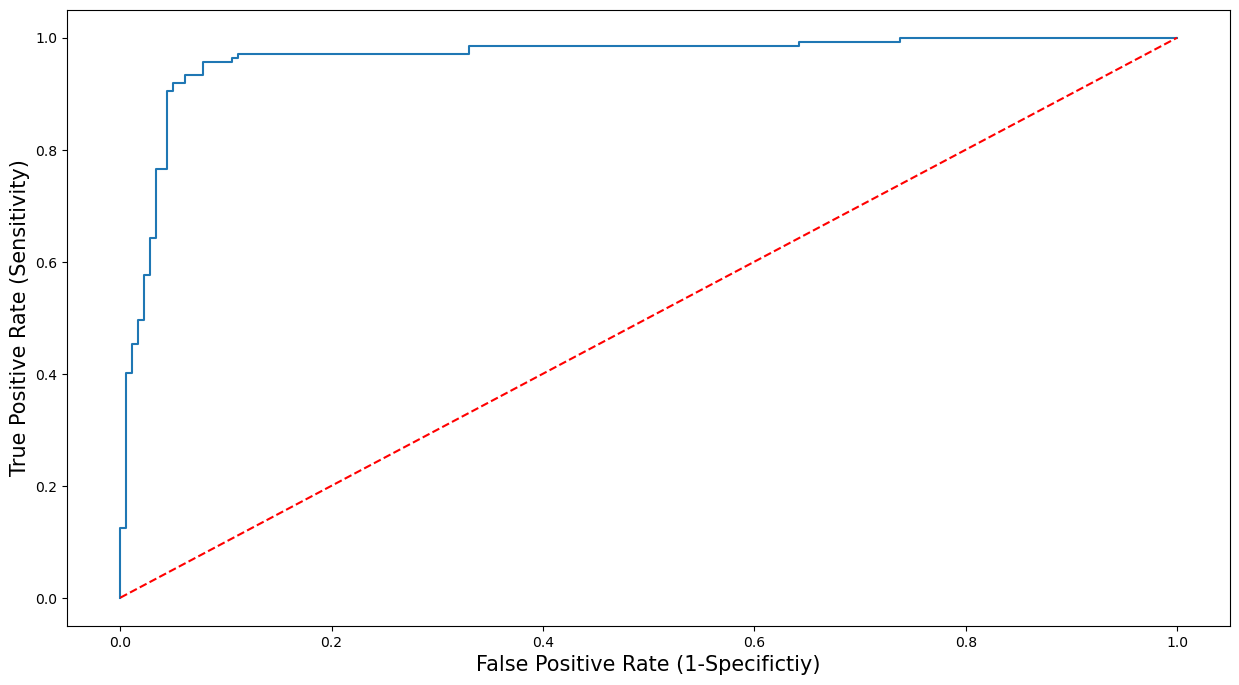

In [42]:
# type your code here
from sklearn.metrics import roc_auc_score,roc_curve

y_pred_prob_gnb = gbcl2.predict_proba(xtest)[:,1] #,1 means 1st column all values

fpr,tpr,threshholds=roc_curve(ytest,y_pred_prob_gnb)

plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate (1-Specifictiy)', fontsize=15)
plt.ylabel('True Positive Rate (Sensitivity)',fontsize=15)
plt.plot([0,1],[0,1],'r--')
print(roc_auc_score(ytest,y_pred_prob_gnb))

<a id="xgb"> </a>
## 3. Extreme Gradient Boosting (XGBoost)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Build the XGBoost model with a learning rate of 0.01 and gamma equal to 2. Calculate the roc_auc score and generate a classification report. Use the test-train data from Question1 and random_state=1
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       179
           1       0.80      0.77      0.78       137

    accuracy                           0.82       316
   macro avg       0.81      0.81      0.81       316
weighted avg       0.82      0.82      0.82       316

0.8105859805080945


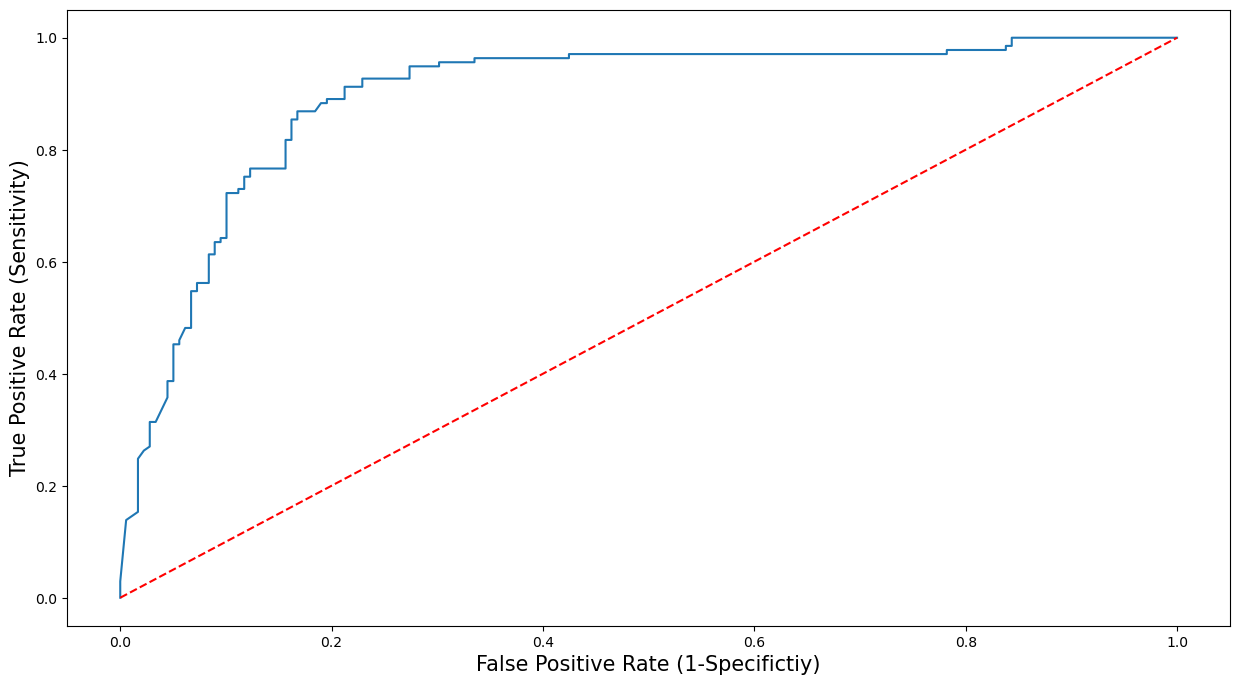

In [45]:
# type your code here
xgb_model = XGBClassifier(learning_rate='0.01',gamma='2')
xgb_model.fit(xtrain,ytrain)
ypred_xgb=xgb_model.predict(xtest)
print(classification_report(ytest,ypred_xgb))

from sklearn.metrics import roc_auc_score,roc_curve

y_pred_prob_xgb = xgb_model.predict_proba(xtest)[:,1] #,1 means 1st column all values
y_pred_xgb=xgb_model.predict(xtest)
fpr,tpr,threshholds=roc_curve(ytest,y_pred_prob_xgb)

plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate (1-Specifictiy)', fontsize=15)
plt.ylabel('True Positive Rate (Sensitivity)',fontsize=15)
plt.plot([0,1],[0,1],'r--')
print(roc_auc_score(ytest,y_pred_xgb))

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>7. Find the best value of hyperparameters "n_estimators", "learning_rate", "gamma" and "max_depth" for the extreme gradient boosting full model(using Grid Search and 5 fold CV). Use the test-train data from Question1 and random_state=1</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

        n_estimators = [100, 120, 150],
        learning_rate = [0.1, 0.01, 0.001, 0.15, 0.015],
        gamma = [2, 3, 4, 5, 6],
        max_depth = [2, 3, 4, 5, 6]

In [79]:



param_grid = { 'n_estimators' :[100, 120, 150],
    'learning_rate' :[0.1, 0.01, 0.001, 0.15, 0.015],
    'gamma' : [2, 3, 4, 5, 6],
    'max_depth' : [2, 3, 4, 5, 6]}


grid_search = GridSearchCV(xgb_model, param_grid, cv=5)


grid_search.fit(xtrain, ytrain)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)



Best parameters: {'gamma': 2, 'learning_rate': 0.15, 'max_depth': 6, 'n_estimators': 100}
Best score: 0.8718301022648849


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>8. Build the XGB model using the tuned parameters obtained in Question7. Calculate the roc_auc score and generate a classification report. Use the test-train data from Question1 and random_state=1</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [50]:
# type your code here
xgb_model2 = XGBClassifier(learning_rate='0.05',gamma='2',max_depth='5',n_estimators=100)
xgb_model2.fit(xtrain,ytrain)
ypred_xgb2=xgb_model.predict(xtest)
print(classification_report(ytest,ypred_xgb2))



              precision    recall  f1-score   support

           0       0.83      0.85      0.84       179
           1       0.80      0.77      0.78       137

    accuracy                           0.82       316
   macro avg       0.81      0.81      0.81       316
weighted avg       0.82      0.82      0.82       316



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>9. Plot the connfusion matrix and the area under the receiver operating characteristic curve for tuned extreme gradient boosting model built in Question8.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [52]:
cm = confusion_matrix(ytest,y_pred_xgb)
cm

array([[153,  26],
       [ 32, 105]], dtype=int64)